##**Machine Learning Algorithms**

###**KNN**

In [8]:
import io
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder

###**Loading Dataset**

**One-Hot Encoded Dataset**

In [9]:
#path_label = "/Users/owner/Downloads/Ind_Proj/knn_heart_label.csv"
#path_nolabel = "/Users/owner/Downloads/Ind_Proj/knn_heart_nolabel.csv"
#path_label = "~/Downloads/Ind_Proj/knn_heart_label.csv"
#path_nolabel = "~/Downloads/Ind_Proj/knn_heart_nolabel.csv"
drive.mount('/content/drive')

path_label = '/content/drive/My Drive/Colab Notebooks/Ind_Proj/knn_heart_label.csv'
path_nolabel = '/content/drive/My Drive/Colab Notebooks/Ind_Proj/knn_heart_nolabel.csv'

knn_heart_label = pd.read_csv(path_label)
knn_heart_nolabel = pd.read_csv(path_nolabel)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###**Splitting Dataset**

In [10]:
knn_train_nolabel = knn_heart_nolabel.iloc[:734]
knn_test_nolabel = knn_heart_nolabel.iloc[734:]

knn_train_label = knn_heart_label.iloc[:734, 6]
knn_test_label = knn_heart_label.iloc[734:, 6]

###**Finding the best k-value**

The k value is gotten from the square root of the training dataset and using that value as the maximum value for the range and the lowest value being 2.


In [11]:
'''
accuracies = []
for k in range(2, 28):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(knn_train_nolabel, knn_train_label)
  prediction = knn.predict(knn_test_nolabel)
  accuracy = accuracy_score(knn_test_label, prediction)
  accuracies.append(accuracy)

  accuracy_data = pd.DataFrame({
      'k':range(2, 28),
      'Accuracy': accuracies
  })
'''

# list to store accuracy scores
accuracies = []

# Loop to compute accuracy for different values of k
for k in range(2, 28):  # Adjust the range as needed
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(knn_train_nolabel, knn_train_label)
    predictions = knn.predict(knn_test_nolabel)
    accuracy = accuracy_score(knn_test_label, predictions)
    accuracies.append(accuracy)

    # check the progress to make sure the loop is executing fully
    print(f'k = {k}: Accuracy = {accuracy}')

# Verify the length of the 'accuracies' list matches the range of k
print("Length of accuracies list:", len(accuracies))

# Create a DataFrame to hold k values and their corresponding accuracies
try:
    accuracy_data = pd.DataFrame({
        'k': range(2, 28),
        'Accuracy': accuracies
    })
    print(accuracy_data)
except Exception as e:
    print("Error in creating DataFrame:", str(e))

k = 2: Accuracy = 0.7282608695652174
k = 3: Accuracy = 0.7663043478260869
k = 4: Accuracy = 0.7391304347826086
k = 5: Accuracy = 0.75
k = 6: Accuracy = 0.7663043478260869
k = 7: Accuracy = 0.7608695652173914
k = 8: Accuracy = 0.7608695652173914
k = 9: Accuracy = 0.7771739130434783
k = 10: Accuracy = 0.7608695652173914
k = 11: Accuracy = 0.7717391304347826
k = 12: Accuracy = 0.782608695652174
k = 13: Accuracy = 0.782608695652174
k = 14: Accuracy = 0.7934782608695652
k = 15: Accuracy = 0.7934782608695652
k = 16: Accuracy = 0.7880434782608695
k = 17: Accuracy = 0.7880434782608695
k = 18: Accuracy = 0.7934782608695652
k = 19: Accuracy = 0.7989130434782609
k = 20: Accuracy = 0.7934782608695652
k = 21: Accuracy = 0.8043478260869565
k = 22: Accuracy = 0.8043478260869565
k = 23: Accuracy = 0.7989130434782609
k = 24: Accuracy = 0.7989130434782609
k = 25: Accuracy = 0.8043478260869565
k = 26: Accuracy = 0.8043478260869565
k = 27: Accuracy = 0.8097826086956522
Length of accuracies list: 26
     k

###**Visualizing K-Values**

k=27 has the best accuracy (80.9%)

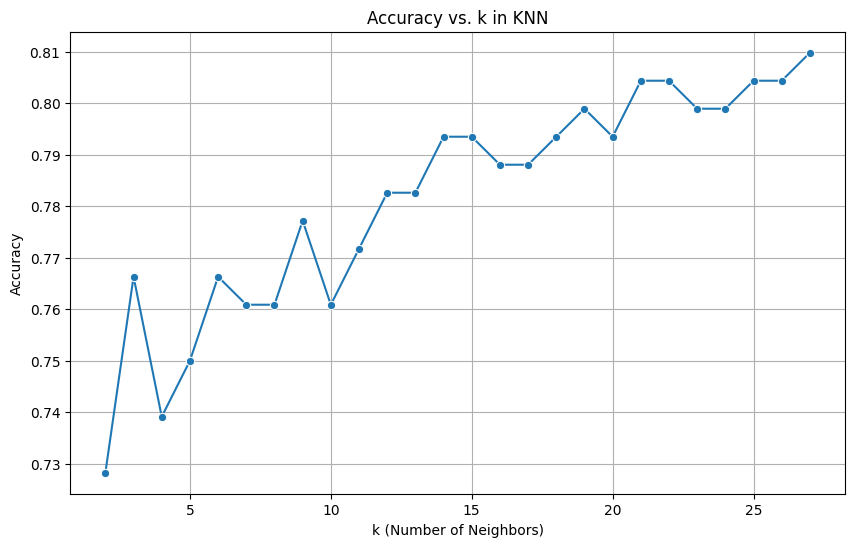

In [12]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=accuracy_data, x= 'k', y = 'Accuracy', marker = 'o' )
plt.title('Accuracy vs. k in KNN')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

###**Evaluating Model Performance**

In [13]:
knn_final = KNeighborsClassifier(n_neighbors=27)
knn_final.fit(knn_train_nolabel, knn_train_label)
final_prediction = knn_final.predict(knn_test_nolabel)
#edit the final output visualization for the prediction
comparison_table = pd.crosstab(knn_test_label, final_prediction, rownames=['Actual'], colnames=['Predicted'])
print(comparison_table)

print("Overall Accuracy for k=27:", accuracy_score(knn_test_label, final_prediction))

Predicted      Heart Disease  Normal
Actual                              
Heart Disease             71      15
Normal                    20      78
Overall Accuracy for k=27: 0.8097826086956522


In [14]:
#classification report
print(classification_report(knn_test_label, final_prediction))

               precision    recall  f1-score   support

Heart Disease       0.78      0.83      0.80        86
       Normal       0.84      0.80      0.82        98

     accuracy                           0.81       184
    macro avg       0.81      0.81      0.81       184
 weighted avg       0.81      0.81      0.81       184



**Label encoded data**

In [15]:
test_label = '/content/drive/My Drive/Colab Notebooks/Ind_Proj/test_knn_label.csv'
test_nolabel = '/content/drive/My Drive/Colab Notebooks/Ind_Proj/test_knn_unlabel.csv'

test_knn_heart_label = pd.read_csv(test_label)
test_knn_heart_nolabel = pd.read_csv(test_nolabel)

In [16]:
testknn_train_nolabel = test_knn_heart_nolabel.iloc[:734]
testknn_test_nolabel = test_knn_heart_nolabel.iloc[734:]

testknn_train_label = test_knn_heart_label.iloc[:734, 11]
testknn_test_label = test_knn_heart_label.iloc[734:, 11]

In [17]:
test_accuracies = []
for k in range(2, 28):
  testknn = KNeighborsClassifier(n_neighbors=k)
  testknn.fit(testknn_train_nolabel, testknn_train_label)
  test_prediction = testknn.predict(testknn_test_nolabel)
  test_accuracy = accuracy_score(testknn_test_label, test_prediction)
  test_accuracies.append(test_accuracy)

  print(f'k = {k}: Accuracy = {test_accuracy}')

print("Length of accuracies list:", len(test_accuracies))

try:
  test_accuracy_data = pd.DataFrame({
      'k': range(2, 28),
      'Accuracy': test_accuracies
  })
  print(test_accuracy_data)
except Exception as e:
  print("Error in creating DataFrame:", str(e))


k = 2: Accuracy = 0.7663043478260869
k = 3: Accuracy = 0.782608695652174
k = 4: Accuracy = 0.7663043478260869
k = 5: Accuracy = 0.7717391304347826
k = 6: Accuracy = 0.7663043478260869
k = 7: Accuracy = 0.7717391304347826
k = 8: Accuracy = 0.7608695652173914
k = 9: Accuracy = 0.7717391304347826
k = 10: Accuracy = 0.7717391304347826
k = 11: Accuracy = 0.75
k = 12: Accuracy = 0.7717391304347826
k = 13: Accuracy = 0.782608695652174
k = 14: Accuracy = 0.7771739130434783
k = 15: Accuracy = 0.7717391304347826
k = 16: Accuracy = 0.7934782608695652
k = 17: Accuracy = 0.7989130434782609
k = 18: Accuracy = 0.7989130434782609
k = 19: Accuracy = 0.7989130434782609
k = 20: Accuracy = 0.7880434782608695
k = 21: Accuracy = 0.7989130434782609
k = 22: Accuracy = 0.8097826086956522
k = 23: Accuracy = 0.7880434782608695
k = 24: Accuracy = 0.7880434782608695
k = 25: Accuracy = 0.782608695652174
k = 26: Accuracy = 0.7608695652173914
k = 27: Accuracy = 0.7663043478260869
Length of accuracies list: 26
     k 

**k = 22** from using the label encoded dataset = **k = 27** from using the one-hot encoded dataset so the results will most likely be the same.
but the one-hot encoded dataset has better accuracies across all values of k than that of the label encoded dataset.

###**SVM**

One-Hot Encoded Dataset

In [18]:
svm_encoded = '/content/drive/My Drive/Colab Notebooks/Ind_Proj/svm_heart.csv'

In [19]:
svm_data = pd.read_csv(svm_encoded)

In [20]:
print(svm_data.shape)

(918, 21)


In [21]:
svm_train = svm_data.iloc[:734]
svm_test = svm_data.iloc[734:]

In [22]:
#drop the column for the dependent variable and create a test and training set with just labels for the dependent variable.
x_train = svm_train.drop(svm_train.columns[6], axis=1)
y_train = svm_train.iloc[:, 6]

In [23]:
x_test = svm_test.drop(svm_test.columns[6], axis =1)
y_test = svm_test.iloc[:, 6]

In [24]:
x_train

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.244898,0.70,0.479270,0,0.788732,0.295455,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,0.428571,0.80,0.298507,0,0.676056,0.409091,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,0.183673,0.65,0.469320,0,0.267606,0.295455,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,0.408163,0.69,0.354892,0,0.338028,0.465909,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,0.530612,0.75,0.323383,0,0.436620,0.295455,0,1,0,0,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,0.285714,0.60,0.489221,0,0.718310,0.295455,0,1,0,1,0,0,0,1,0,1,0,0,0,1
730,0.428571,0.67,0.449420,0,0.718310,0.295455,1,0,0,1,0,0,0,1,0,1,0,0,1,0
731,0.367347,0.60,0.412935,0,0.591549,0.386364,0,1,1,0,0,0,1,0,0,1,0,0,0,1
732,0.571429,1.00,0.477612,1,0.514085,0.750000,1,0,1,0,0,0,1,0,0,0,1,1,0,0


In [25]:
y_train

0             Normal
1      Heart Disease
2             Normal
3      Heart Disease
4             Normal
           ...      
729           Normal
730           Normal
731    Heart Disease
732    Heart Disease
733           Normal
Name: HeartDisease, Length: 734, dtype: object

####**Creating the Classifier**

In [26]:
#using linear kernel
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(x_train, y_train)

SVC(kernel='linear')

####**Evaluate Prediction**

In [27]:
#predict the test set
svm_prediction = svm_classifier.predict(x_test)

In [28]:
#Understanding Classification Results
conf_matrix = confusion_matrix(y_test, svm_prediction)
print("Confusion Matrix:")
print(conf_matrix)
print("--------------------------------------------------------------------------")
table = pd.crosstab(y_test, svm_prediction, rownames=['Actual'], colnames=['Predicted'])
print(table)

Confusion Matrix:
[[64 22]
 [21 77]]
--------------------------------------------------------------------------
Predicted      Heart Disease  Normal
Actual                              
Heart Disease             64      22
Normal                    21      77


In [29]:
#Compare the predictions with the actual label
svm_compare = svm_prediction == y_test

print("Comparison Table: ")
print(pd.crosstab(svm_compare, columns="count"))



Comparison Table: 
col_0         count
HeartDisease       
False            43
True            141


There were 141 results that were predicted right and 43 that were wrongly predicted.

In [30]:
#summary of comparison results
print("Proportion Table:")
print(svm_compare.value_counts(normalize=True))

Proportion Table:
HeartDisease
True     0.766304
False    0.233696
Name: proportion, dtype: float64


SVM with linear kernel had a 76% accuracy which is less than KNN which had an 80% accuracy. Both seem to be low by my standards.
The next few cells will be me trying to improve the accuracy for SVM by trying out different kernels and choosing the best one.


####**Improving the Model**

Adjust the hyperparameters of the SVM model and try different kernels.
The kernels we will be trying are the linear, polynomial and Gaussian RBF kernel.

In [31]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf'],
    'degree': [2, 3, 4], #relevant for polynomial kernel.
    'gamma': ['scale', 'auto'] #relevant for polynomial and kernel.
}
svm = SVC()
#perform the grid search using cross validation
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters found: ", best_params)
print("Best cross-validation score: ", best_score)

Best parameters found:  {'C': 1, 'degree': 3, 'gamma': 'auto', 'kernel': 'poly'}
Best cross-validation score:  0.8650172397726215


####**Evaluating the best model**

In [32]:
#training the best model
svm_best = grid_search.best_estimator_
svm_best.fit(x_train, y_train)



SVC(C=1, gamma='auto', kernel='poly')

In [33]:
#prediction
svm_best_prediction = svm_best.predict(x_test)

confuse_matrix = confusion_matrix(y_test, svm_best_prediction)
print("Confusion Matrix:")
print(confuse_matrix)
print("---------------------------------------------")
comp_table = pd.crosstab(y_test, svm_best_prediction, rownames=['Actual'], colnames=['Predicted'])
print(comp_table)

Confusion Matrix:
[[73 13]
 [32 66]]
---------------------------------------------
Predicted      Heart Disease  Normal
Actual                              
Heart Disease             73      13
Normal                    32      66


In [34]:
#compare with labels
svm_best_compare = svm_best_prediction == y_test

print("Comparison Table:")
print(pd.crosstab(svm_best_compare, columns="count"))
print("---------------------------------------------")
print("Proportion Table:")
print(svm_best_compare.value_counts(normalize=True))

Comparison Table:
col_0         count
HeartDisease       
False            45
True            139
---------------------------------------------
Proportion Table:
HeartDisease
True     0.755435
False    0.244565
Name: proportion, dtype: float64


The accuracy here is 75% which is even worse than the initial attempt.

Label Encoded Dataset

In [35]:
svm_labelencoded = '/content/drive/My Drive/Colab Notebooks/Ind_Proj/svm_labelencoded.csv'

In [36]:
data_svm = pd.read_csv(svm_labelencoded)

In [37]:
print(data_svm.shape)

(918, 12)


In [38]:
train_svm = data_svm.iloc[:734]
test_svm = data_svm.iloc[734:]

train_x = train_svm.drop(data_svm.columns[11], axis=1)
train_y = train_svm.iloc[:, 11]

test_x = test_svm.drop(data_svm.columns[11], axis =1)
test_y = test_svm.iloc[:, 11]


In [39]:
svm_classifier2 = SVC(kernel='linear')
svm_classifier2.fit(train_x, train_y)


SVC(kernel='linear')

In [40]:
svm_prediction2 = svm_classifier2.predict(test_x)
conf_matrix2 = confusion_matrix(test_y, svm_prediction2)
print("Confusion Matrix:")
print(conf_matrix2)
print("-------------------------------------------------")
table2 = pd.crosstab(test_y, svm_prediction2, rownames=['Actual'], colnames=['Predicted'])
print(table2)

Confusion Matrix:
[[66 20]
 [29 69]]
-------------------------------------------------
Predicted      Heart Disease  Normal
Actual                              
Heart Disease             66      20
Normal                    29      69


In [41]:
svm_compare2 = svm_prediction2 == test_y

print("Comparison Table: ")
print(pd.crosstab(svm_compare2, columns="count"))

Comparison Table: 
col_0         count
HeartDisease       
False            49
True            135


In [42]:
print("Proportion Table:")
print(svm_compare2.value_counts(normalize=True))

Proportion Table:
HeartDisease
True     0.733696
False    0.266304
Name: proportion, dtype: float64


Label Enocded dataset produced an accuracy of 73% which is lower than the accuracy of the one-hot encoded dataset

---



####**Improving the Model**

In [43]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf'],
    'degree': [2, 3, 4], #relevant for polynomial kernel.
    'gamma': ['scale', 'auto'] #relevant for polynomial and kernel.
}
svm = SVC()
#perform the grid search using cross validation
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
grid_search.fit(train_x, train_y)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters found: ", best_params)
print("Best cross-validation score: ", best_score)

Best parameters found:  {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validation score:  0.8595750629018731


In [44]:
svm_best2 = grid_search.best_estimator_
svm_best2.fit(train_x, train_y)

SVC(C=1, degree=2)

In [45]:
#prediction
svm_best_prediction2 = svm_best2.predict(test_x)

confuse_matrix2 = confusion_matrix(test_y, svm_best_prediction2)
print("Confusion Matrix:")
print(confuse_matrix2)
print("---------------------------------------------")
comp_table2 = pd.crosstab(test_y, svm_best_prediction2, rownames=['Actual'], colnames=['Predicted'])
print(comp_table2)

Confusion Matrix:
[[70 16]
 [25 73]]
---------------------------------------------
Predicted      Heart Disease  Normal
Actual                              
Heart Disease             70      16
Normal                    25      73


In [46]:
#classification report
print(classification_report(test_y, svm_best_prediction2))

               precision    recall  f1-score   support

Heart Disease       0.74      0.81      0.77        86
       Normal       0.82      0.74      0.78        98

     accuracy                           0.78       184
    macro avg       0.78      0.78      0.78       184
 weighted avg       0.78      0.78      0.78       184



In [ ]:
#compare with labels
svm_best_compare2 = svm_best_prediction2 == test_y

print("Comparison Table:")
print(pd.crosstab(svm_best_compare2, columns="count"))
print("---------------------------------------------")
print("Proportion Table:")
print(svm_best_compare2.value_counts(normalize=True))

Comparison Table:
col_0         count
HeartDisease       
False            41
True            143
---------------------------------------------
Proportion Table:
HeartDisease
True     0.777174
False    0.222826
Name: proportion, dtype: float64


After Improving the Model, the Label Encoded Dataset with the RBF kernel had a better accuracy of 77% than any other model.

But in the end KNN still has a better accuracy than all svm models.

##**Artifical Neural Networks**##

In [ ]:
training_path = '/content/drive/MyDrive/Colab Notebooks/Ind_Proj/deeplearning1_training.csv'
traininglabel_path = '/content/drive/MyDrive/Colab Notebooks/Ind_Proj/deeplearning1_traininglabel.csv'
eval_path = '/content/drive/MyDrive/Colab Notebooks/Ind_Proj/deeplearning1_evaluate.csv'
eval_label_path = '/content/drive/MyDrive/Colab Notebooks/Ind_Proj/deeplearning1_evaluatelabel.csv'
test_path = '/content/drive/MyDrive/Colab Notebooks/Ind_Proj/deeplearning1_test.csv'
testlabels_path = '/content/drive/MyDrive/Colab Notebooks/Ind_Proj/deeplearning1_testlabels.csv'

deeplearning1_training = pd.read_csv(training_path)
deeplearning1_traininglabel = pd.read_csv(traininglabel_path)
deeplearning1_evaluate = pd.read_csv(eval_path)
deeplearning1_evaluatelabel = pd.read_csv(eval_label_path)
deeplearning1_test = pd.read_csv(test_path)
deeplearning1_testlabels = pd.read_csv(testlabels_path)

There are 700 records in the training dataset.
295 patients have normal heart conditions while 405 patients have a heart disease.

There are 109 records in the evaluation dataset.
57 patients have normal heart conditions while 52 patients have a heart disease.

There are 109 records in the test dataset.
58 patients have normal heart conditions while 51 patients have a heart disease.

In general, 508 patients have a heart disease while 410 have normal conditions.

In [ ]:
print("Training shape:", deeplearning1_training.shape)
print("Evaluation shape:", deeplearning1_evaluate.shape)
print("Test shape:", deeplearning1_test.shape)
#no need to reshape or normalize

Training shape: (700, 11)
Evaluation shape: (109, 11)
Test shape: (109, 11)


All labelled datasets are not numerical and need to be changed to avoid errors

Normal: 1

Heart Disease: 0


In [ ]:
label_encoder = LabelEncoder()

deeplearning1_traininglabel = label_encoder.fit_transform(deeplearning1_traininglabel.iloc[:, 0])
deeplearning1_evaluatelabel = label_encoder.fit_transform(deeplearning1_evaluatelabel.iloc[:, 0])
deeplearning1_testlabels = label_encoder.fit_transform(deeplearning1_testlabels.iloc[:, 0])

In [ ]:
#Verify
deeplearning1_traininglabel.shape

(700,)

In [ ]:
deeplearning1_traininglabel

In [ ]:
#try with revamped dataset
main_data_path = '/content/drive/MyDrive/Colab Notebooks/Ind_Proj/deeplearning1.csv'
main_data = pd.read_csv(main_data_path)

main_data = main_data.sample(frac=1, random_state=22)#.reset_index(drop=True)
training = main_data.iloc[:700]
remaining = main_data.iloc[700:]
evaluation = remaining.iloc[:109]
test = remaining.iloc[109:]
deeplearning1_training = training.iloc[:, :-1]
deeplearning1_traininglabel = training.iloc[:,-1]
deeplearning1_evaluate = evaluation.iloc[:, :-1]
deeplearning1_evaluatelabel = evaluation.iloc[:,-1]
deeplearning1_test = test.iloc[:, :-1]
deeplearning1_testlabels = test.iloc[:,-1]

deeplearning1_traininglabel = label_encoder.fit_transform(deeplearning1_traininglabel.values)
deeplearning1_evaluatelabel = label_encoder.fit_transform(deeplearning1_evaluatelabel.values)
deeplearning1_testlabels = label_encoder.fit_transform(deeplearning1_testlabels.values)

####**Build the model**


In [ ]:
model = keras.Sequential()

In [ ]:
#add the hidden layers
#we'll start with two hidden layers, one with 512 neurons and the second as an output layer with 2 neurons
model.add(layers.Dense(700, activation="relu"))
model.add(layers.Dense(400, activation="relu"))
model.add(layers.Dense(2, activation="softmax"))

In [ ]:
#compile the model
opt = keras.optimizers.RMSprop(learning_rate=0.001)

In [ ]:
model.compile(
    optimizer=opt,
    loss="sparse_categorical_crossentropy",
    #loss = "binary_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
model.fit(deeplearning1_training, deeplearning1_traininglabel, epochs = 60, batch_size = 10)

Epoch 1/60
70/70 [==============================] - 0s 7ms/step - loss: 0.0297 - accuracy: 0.9857
Epoch 2/60
70/70 [==============================] - 0s 6ms/step - loss: 0.0401 - accuracy: 0.9900
Epoch 3/60
70/70 [==============================] - 1s 10ms/step - loss: 0.0573 - accuracy: 0.9857
Epoch 4/60
70/70 [==============================] - 1s 13ms/step - loss: 0.0271 - accuracy: 0.9914
Epoch 5/60
70/70 [==============================] - 1s 15ms/step - loss: 0.0376 - accuracy: 0.9900
Epoch 6/60
70/70 [==============================] - 1s 17ms/step - loss: 0.0196 - accuracy: 0.9929
Epoch 7/60
70/70 [==============================] - 1s 13ms/step - loss: 0.0365 - accuracy: 0.9900
Epoch 8/60
70/70 [==============================] - 1s 11ms/step - loss: 0.0309 - accuracy: 0.9943
Epoch 9/60
70/70 [==============================] - 1s 10ms/step - loss: 0.0134 - accuracy: 0.9971
Epoch 10/60
70/70 [==============================] - 1s 11ms/step - loss: 0.0388 - accuracy: 0.9929
Epoch 11/60

In [ ]:
#Trial 1: final accuracy was 85% from training with 512 neurons, epoch = 5, batch_size = 100
#Trial 2: final accuracy was 89% from training with 512 neurons, epoch = 5, batch_size = 10
#note that the weights have not been saved yet.
#Trial 3: final accuracy was 89% from training with 400 neurons, epoch = 5, batch_size = 10
#Trial 4: final accuracy was 89% from training with 700 neurons, epoch = 5, batch_size = 10
#Trial 5: final accuracy wa   s 90% from training with 2 hidden layers (700 neurons in the first and 22 in the second), epoch = 5, batch_size = 10
#Trial 6: final accuracy was 92% from traing with (650 neurons, epoch = 10, batch_size = 100)
#Trial 7: final accuracy was 91% from training with 11 neurons, epoch = 50, batch_size = 32
#might be stuck on a local minimum.
#added a new hidden layer in Trial 8 and put 11 neurons in each layer and still had the same accuracy
#Trial 9: 10 neurons, epoch = 40, batch size = 16, 92% accuracy

In [ ]:
#save & load the weights
model.save_weights('/content/drive/MyDrive/Colab Notebooks/Ind_Proj')

In [ ]:
#load the weights
model.load_weights('/content/drive/MyDrive/Colab Notebooks/Ind_Proj')

In [ ]:
#Evaluate model
test_loss, test_acc = model.evaluate(deeplearning1_evaluate, deeplearning1_evaluatelabel)

4/4 [==============================] - 0s 4ms/step - loss: 2.0870 - accuracy: 0.8165


In [ ]:
print(f"Test Loss: {test_loss:.3f}")
print(f"Test accuracy: {test_acc:.3f}")

Test Loss: 1.675
Test accuracy: 0.835


In [ ]:
#Predictions
test = deeplearning1_test[0:10]
predictions = model.predict(test)

1/1 [==============================] - 0s 37ms/step


In [ ]:
#predict first 10 patient results
print("0: Heart Disease")
print("1: Normal")
print("-----------------------------------------------")
for x in range(10):
  print("                    ")
  print("Patient",x, "actual result: ", deeplearning1_testlabels[x])
  for y in range(predictions.shape[1]):
    print("Patient predicted result: ", y, ":", predictions[x, y])


0: Heart Disease
1: Normal
-----------------------------------------------
                    
Patient 0 actual result:  1
Patient predicted result:  0 : 2.5607077e-13
Patient predicted result:  1 : 0.99999994
                    
Patient 1 actual result:  0
Patient predicted result:  0 : 0.99999994
Patient predicted result:  1 : 8.3902564e-23
                    
Patient 2 actual result:  1
Patient predicted result:  0 : 0.9999996
Patient predicted result:  1 : 3.177217e-07
                    
Patient 3 actual result:  1
Patient predicted result:  0 : 5.1777545e-14
Patient predicted result:  1 : 0.99999994
                    
Patient 4 actual result:  0
Patient predicted result:  0 : 0.99999994
Patient predicted result:  1 : 5.355104e-09
                    
Patient 5 actual result:  1
Patient predicted result:  0 : 0.9884708
Patient predicted result:  1 : 0.011529144
                    
Patient 6 actual result:  1
Patient predicted result:  0 : 1.1921162e-18
Patient predicted res

In [ ]:
Test = deeplearning1_test
prediction = model.predict(Test)
prediction = np.argmax(prediction, axis=1)

4/4 [==============================] - 0s 4ms/step


In [ ]:
print(prediction.shape)

(109,)


In [ ]:
print(deeplearning1_testlabels.shape)

(109,)


In [ ]:
#confusion matrix for predictions
print("0: Heart Disease")
print("1: Normal")
print("-----------------------------------------------")
dl_confuse = confusion_matrix(deeplearning1_testlabels, prediction)
print("Confusion Matrix:")
print(dl_confuse)
print("---------------------------------------------")
dl_comptable = pd.crosstab(deeplearning1_testlabels, prediction, rownames=['Actual'], colnames=['Predicted'])
print(dl_comptable)

0: Heart Disease
1: Normal
-----------------------------------------------
Confusion Matrix:
[[55  9]
 [13 32]]
---------------------------------------------
Predicted   0   1
Actual           
0          55   9
1          13  32


In [ ]:
accuracy = accuracy_score(deeplearning1_testlabels, prediction)
print("Deep Learning Accuracy:", accuracy)

Deep Learning Accuracy: 0.7981651376146789


In [ ]:
#save the model
model.save('/content/drive/MyDrive/Colab Notebooks/softmax model')